# 👩‍💻 Predicting House Prices Using Linear Regression

## 📋 Overview
In this hands-on lab, you'll work with the California Housing Dataset to build a linear regression model that predicts house prices. You’ll follow a real-world data science workflow: exploring the data, preparing it, training a model, and evaluating the results both quantitatively and visually.

## 🎯 Learning Outcomes
By the end of this lab, you will be able to:
- ✅ Load, explore, and prepare real-world tabular data
- ✅ Select features using correlation and EDA
- ✅ Train and evaluate a regression model
- ✅ Visualize and interpret model performance

## 📂 Task 1: Load the Dataset
**Context:** First, get the data into your environment so you can start exploring.

**Steps:**

- Use `fetch_california_housing(as_frame=True)` from sklearn.datasets.

- Access the DataFrame using the `.frame` attribute of the loaded object (e.g., `data = housing.frame`).

- Use `.head()`, `.info()`, and `.describe()` to inspect the structure and summary statistics.

**💡 Tip:** The target variable is 'MedHouseVal', which represents the median house value in $100,000s.

In [29]:
# Load the California housing dataset and display basic info

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# View data
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**⚙️ Test Your Work:**

- The DataFrame has 8 features and a 'MedHouseVal' column.

## 🔍 Task 2: Explore Data
**Context:** Get to know the data — see what features might relate to house prices.

**Steps:**

- Use histograms to inspect distributions.

- Use scatter plots to examine relationships (e.g., AveRooms vs. MedHouseVal).

- Use `seaborn.heatmap()` to check for correlations.

**Prompting Questions:**

- Which features have strong positive or negative correlation with price?

- Are any features skewed or have unusual patterns?

**💡 Tip:** Start with `sns.pairplot()` or `df.corr()` for quick insights.

# Visualize correlations between features and house prices

### Histogram to inspect distributions

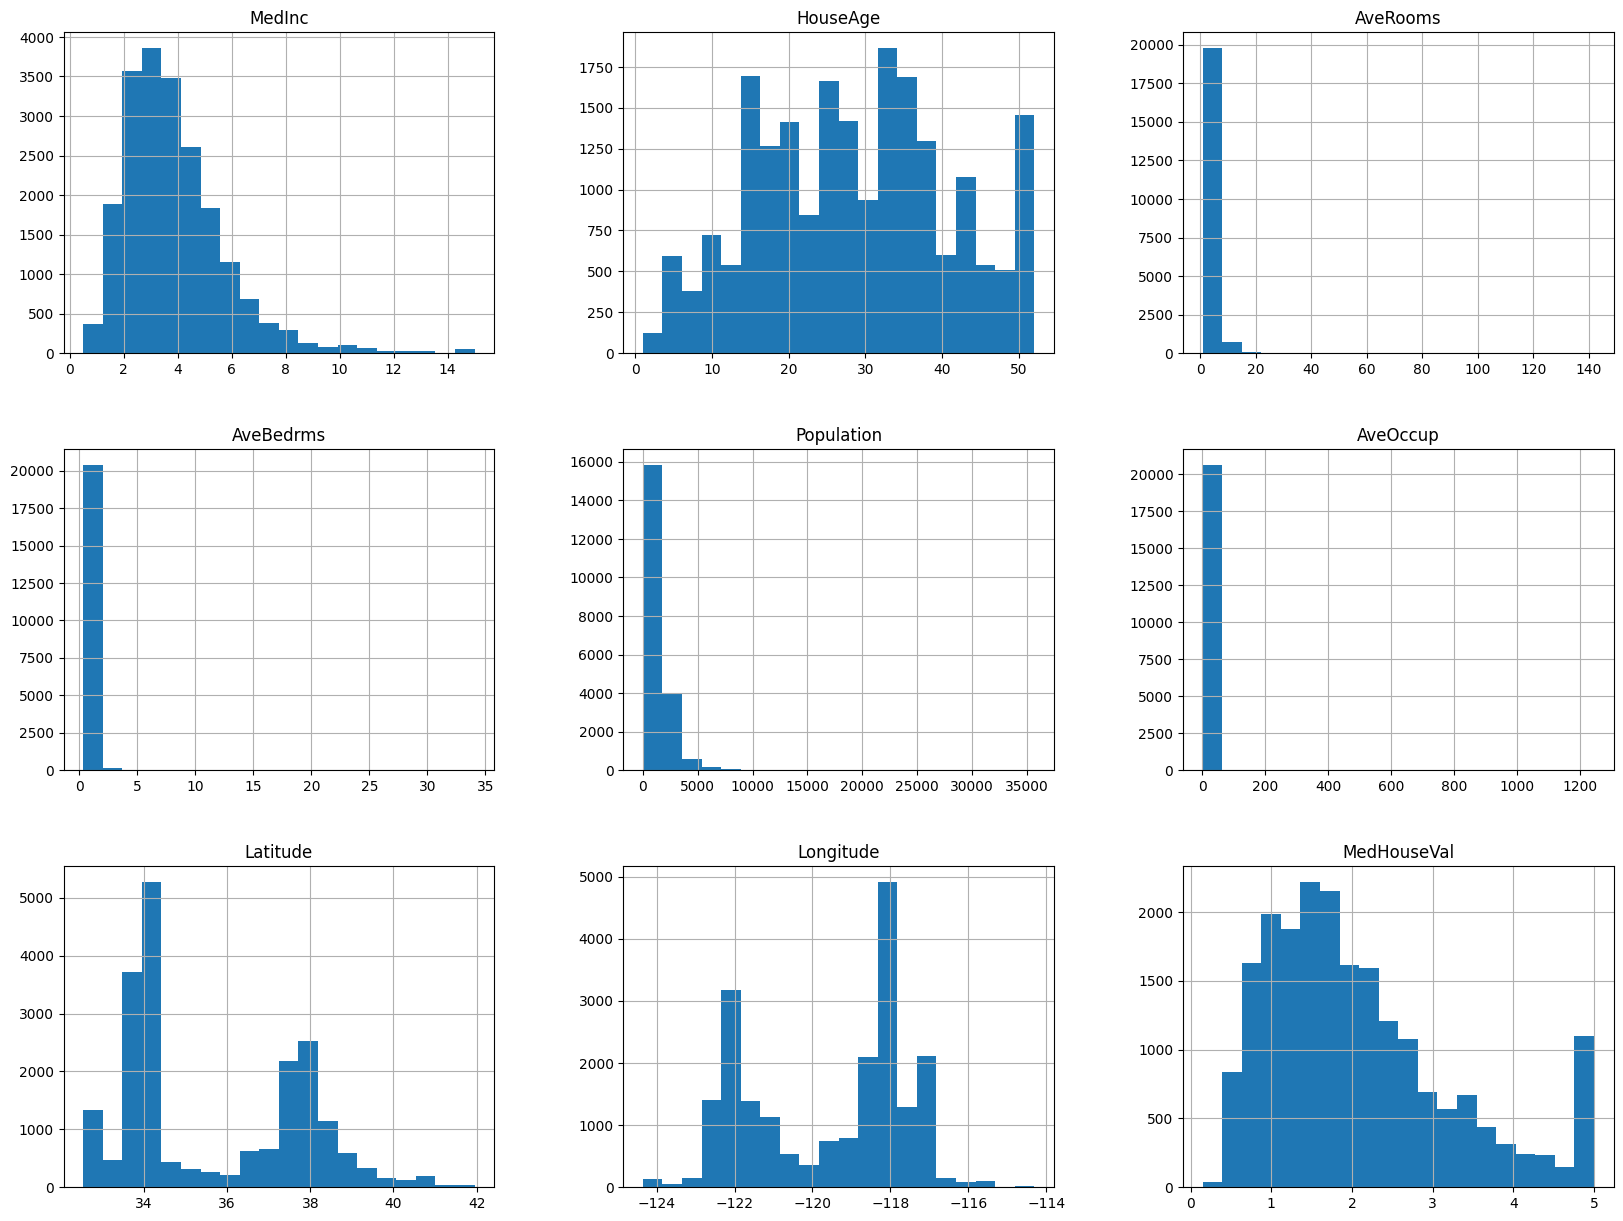

In [30]:
# histogram to inspect distributions
data.hist(bins=20, figsize=(20,15))
plt.show()


- Many features (AveRooms, AveBedrms, AveOccup, Population) show long right tails, indicating the presence of outliers.

- Median income and house values have more bell-shaped or mildly skewed distributions.

- Latitude and Longitude histograms indicate geographical clustering of data points.

- HouseAge shows periodic peaks, likely reflecting development booms in certain eras.

### pair plot

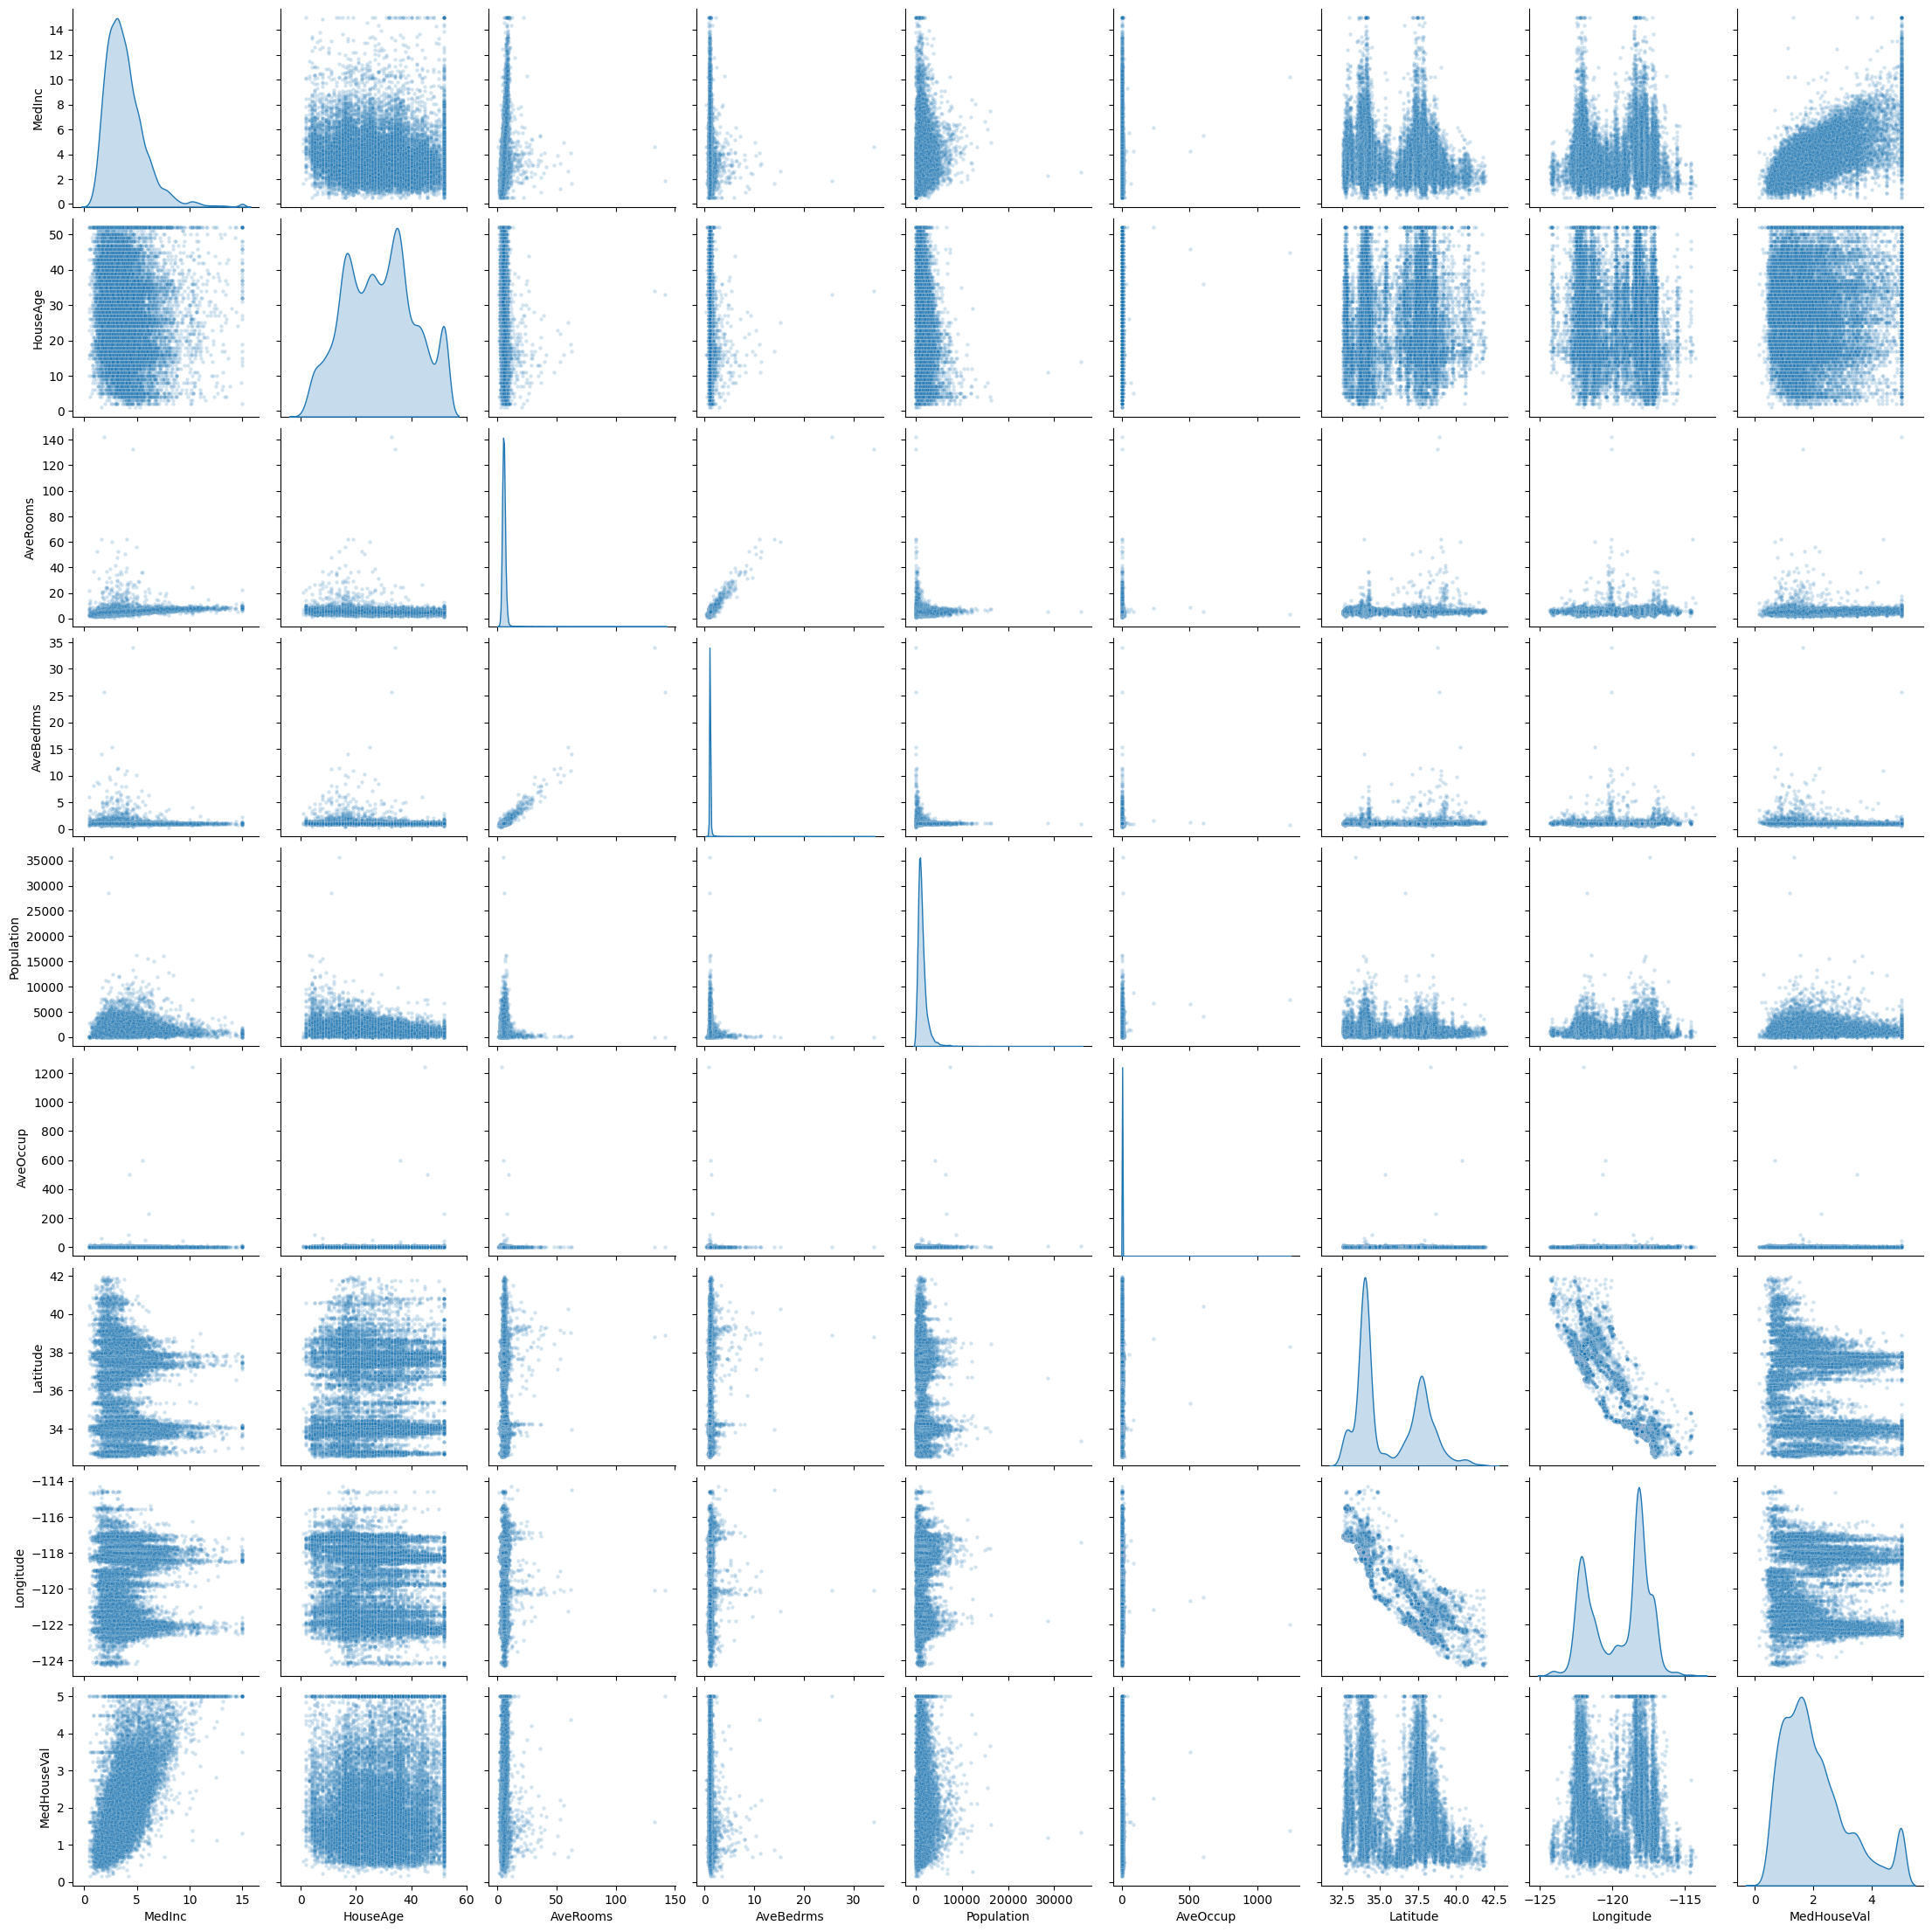

In [31]:
# make pair plot to explore relationships
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.2, 's':10})
plt.show()

This pair plot gives a quick visual overview of feature relationships, showing that:

- Income and location are the most important predictors of house value.

- Some features may require scaling or transformation (e.g., log transformation) before model training.

- Outliers need to be handled for cleaner modeling.

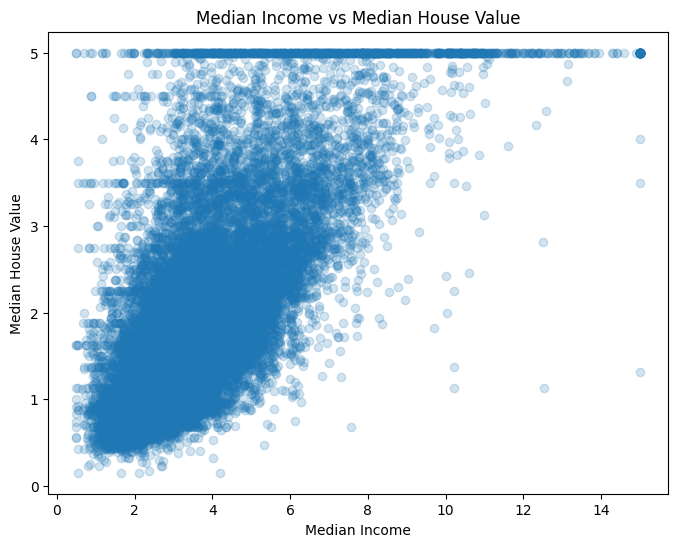

In [32]:
# scatter plot of MedInc vs MedHouseVal
plt.figure(figsize=(8,6))
plt.scatter(data['MedInc'], data['MedHouseVal'], alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

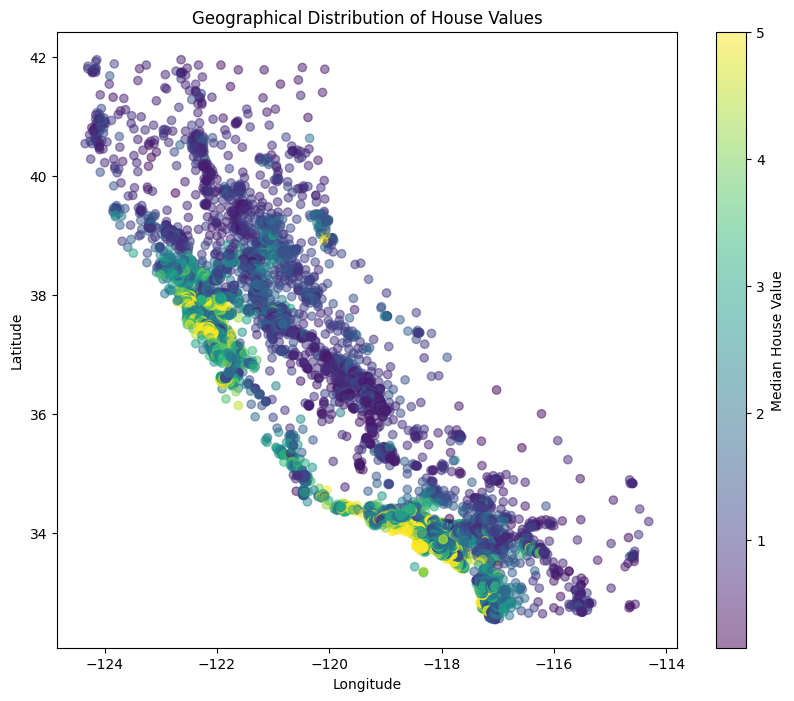

In [33]:
# scatter plot of latitude vs longitude colored by MedHouseVal
plt.figure(figsize=(10,8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Values')
plt.show()

### Correlation 

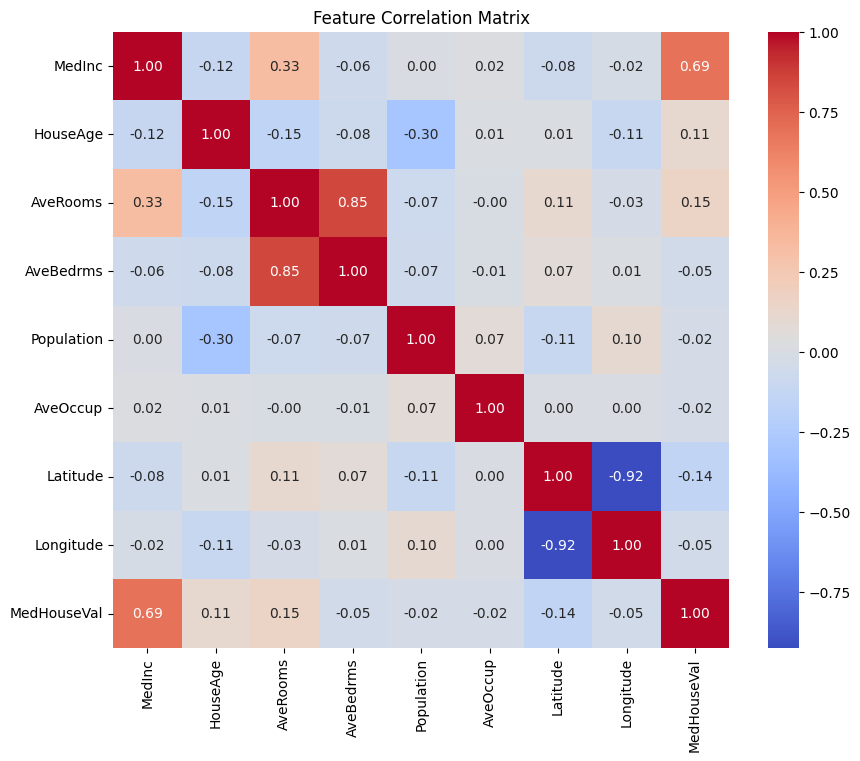

In [34]:
# heat map of correlations
plt.figure(figsize=(10,8))  
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

| Feature Pair           | Correlation | Interpretation                                                 |
| ---------------------- | ----------- | -------------------------------------------------------------- |
| MedInc – MedHouseVal   | **0.69**    | Strong positive — richer areas → higher house prices           |
| AveRooms – AveBedrms   | **0.85**    | Very strong positive — similar info, risk of multicollinearity |
| Latitude – Longitude   | **-0.92**   | Geographic pattern                                             |
| AveRooms – MedHouseVal | 0.15        | Slight positive                                                |
| HouseAge – Population  | -0.30       | Older houses in less populated areas                           |
| Most others            | Near 0      | Weak/no linear relationship                                    |


**⚙️ Test Your Work:**

- Correlation heatmap is generated

- Plots highlight a few key feature-price relationships

## 🧹 Task 3: Data Preparation
**Context:** Clean and prepare data to ensure the model trains effectively.

**Steps:**

- Check for missing values and handle if needed (e.g., `.isnull().sum()`).

- Standardize or normalize numeric features using StandardScaler (optional for linear regression but good practice).

- Drop or transform any problematic columns if identified in EDA.

**💡 Tip:** Standardizing features helps models converge faster and compare weights meaningfully.

# Clean and prepare the dataset

### Checking missing values

In [35]:
data.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [36]:
# data statics summary
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


🧠 Next Steps Before Modeling:

✅ Log-transform skewed features (Population, AveOccup, AveRooms)

🧹 Handle extreme outliers in AveRooms and AveOccup (e.g., cap at 99th percentile)

🗺️ Consider feature engineering with Latitude and Longitude (e.g., clustering or distance to coast)

✂️ Remove one of AveRooms or AveBedrms to reduce multicollinearity

⚠️ Be aware of MedHouseVal cap when interpreting model performance

In [37]:
# long-tranform skewed features Population, AveOccup, AveRooms
data['Population'] = np.log1p(data['Population'])
data['AveOccup'] = np.log1p(data['AveOccup'])
data['AveRooms'] = np.log1p(data['AveRooms'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,2.077455,1.023810,5.777652,1.268511,37.88,-122.23,4.526
1,8.3014,21.0,1.979364,0.971880,7.784057,1.134572,37.86,-122.22,3.585
2,7.2574,52.0,2.228738,1.073446,6.208590,1.335596,37.85,-122.24,3.521
3,5.6431,52.0,1.919471,1.073059,6.326149,1.266369,37.85,-122.25,3.413
4,3.8462,52.0,1.985385,1.081081,6.338594,1.157342,37.85,-122.25,3.422


## Handle outliers

In [38]:
# Handle extreme outliers in AveRooms and AveOccup (e.g., cap at 99th percentile)
data = data[data['AveRooms'] < data['AveRooms'].quantile(0.99)] # this will remove some rows
data = data[data['AveOccup'] < data['AveOccup'].quantile(0.99)]
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,2.077455,1.023810,5.777652,1.268511,37.88,-122.23,4.526
1,8.3014,21.0,1.979364,0.971880,7.784057,1.134572,37.86,-122.22,3.585
2,7.2574,52.0,2.228738,1.073446,6.208590,1.335596,37.85,-122.24,3.521
3,5.6431,52.0,1.919471,1.073059,6.326149,1.266369,37.85,-122.25,3.413
4,3.8462,52.0,1.985385,1.081081,6.338594,1.157342,37.85,-122.25,3.422


## Multicolinearlity 

In [39]:
# make new feature using PCA to combine AveRooms and AveBedrms and remove AveBedrms and AveRooms columns
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
data['Rooms_Bedrooms_PCA'] = pca.fit_transform(data[['AveRooms', 'AveBedrms']])
data = data.drop(columns=['AveRooms', 'AveBedrms'])

In [40]:
# make new feature using pca to combine Latitude and Longitude into a single feature
pca_geo = PCA(n_components=1)
data['Geo_PCA'] = pca_geo.fit_transform(data[['Latitude', 'Longitude']])
data = data.drop(columns=['Latitude', 'Longitude'])
data.head()


,MedInc,HouseAge,Population,AveOccup,MedHouseVal,Rooms_Bedrooms_PCA,Geo_PCA
0,8.3252,41.0,5.777652,1.268511,4.526,0.243318,3.458052
1,8.3014,21.0,7.784057,1.134572,3.585,0.136368,3.436619
2,7.2574,52.0,6.208590,1.335596,3.521,0.401728,3.442991
3,5.6431,52.0,6.326149,1.266369,3.413,0.099583,3.449826
4,3.8462,52.0,6.338594,1.157342,3.422,0.165683,3.449826


**⚙️ Test Your Work:**
- No missing values remain
- Feature scales are consistent (if standardized)

## 🧠 Task 4: Feature Selection
**Context:** Choose the most relevant features for the model using your EDA.

**Steps:**

- Use correlation coefficients (`.corr()`) to identify strong predictors.

- Drop weak or redundant features (e.g., highly correlated pairs).

- Store selected features in a new variable `X_selected`.

**Prompting Questions:**

- Are any features too weakly correlated to be useful?

- Are any features too correlated with each other?

**💡 Tip:** Remove multicollinear features to avoid redundant information.

# Select features with highest correlation to target

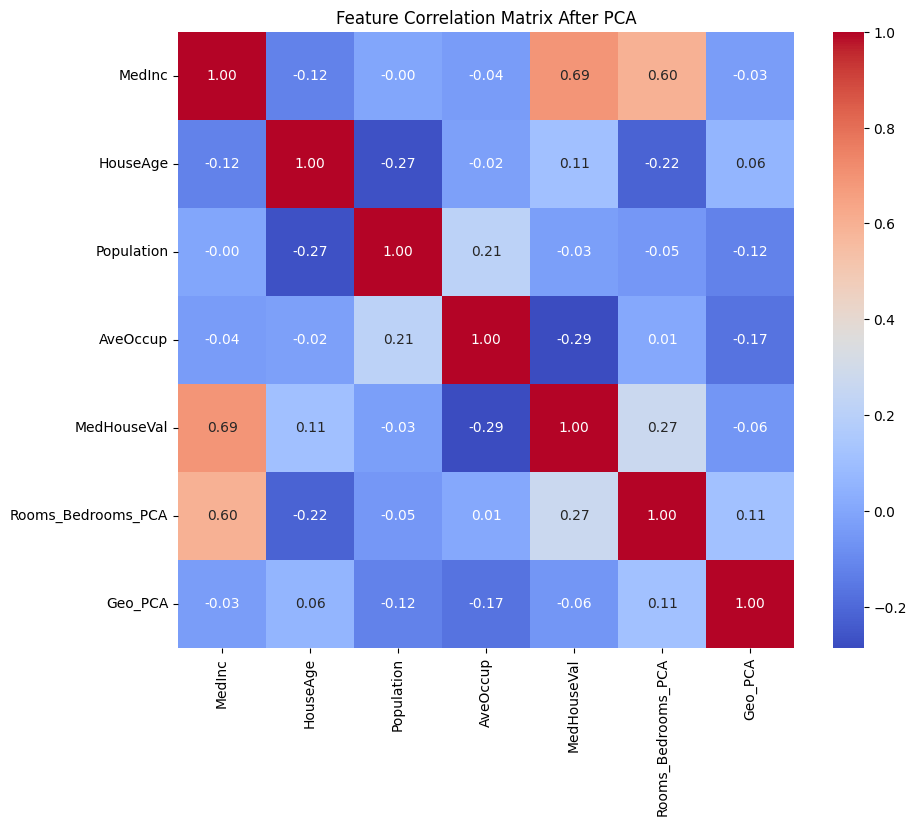

In [41]:
# check the correlation matrix again
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix After PCA')
plt.show()


In [47]:
# first drop features with low correlation to target and make new data set x_selected
x_selected = data[['MedInc', 'Rooms_Bedrooms_PCA', 'HouseAge', 'Geo_PCA']]
x_selected.head()



,MedInc,Rooms_Bedrooms_PCA,HouseAge,Geo_PCA
0,8.3252,0.243318,41.0,3.458052
1,8.3014,0.136368,21.0,3.436619
2,7.2574,0.401728,52.0,3.442991
3,5.6431,0.099583,52.0,3.449826
4,3.8462,0.165683,52.0,3.449826


**⚙️ Test Your Work:**
- X_selected contains the cleaned and selected features

## 🧪 Task 5: Train the Model
**Context:** Now you’ll train a simple linear regression model using your selected features.

**Steps:**

- Split the data using `train_test_split()`

- Instantiate `LinearRegression()` from scikit-learn

- Fit the model using `model.fit(X_train, y_train)`

In [49]:
# Train a linear regression model on the selected features
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


**⚙️ Test Your Work:**

- Model trains without error

- Coefficients and intercept are available with `.coef_` and `.intercept_`

## 📈 Task 6: Model Evaluation
**Context:** Time to see how well your model actually performs.

**Steps:**

- Predict prices on the test set

- Use `r2_score()` and `mean_squared_error()` to evaluate

- Print and interpret the results

**💡 Tip:** R² tells you how much variance is explained by the model. MSE shows average squared error.

In [50]:
# Evaluate model with R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R^2: 0.5143
Mean Squared Error: 0.6812


**⚙️ Test Your Work:**
- R² and MSE values are printed and interpreted
- Reasonable performance based on initial expectations

## 📊 Task 7: Visualize Results
**Context:** Visual validation helps you see model strengths and weaknesses.

**Steps:**

- Create a scatter plot of y_test vs. y_pred

- Plot a diagonal reference line

- Optionally: Create a residual plot to examine prediction errors

**Prompting Questions:**

- Are predictions close to actuals?

- Is there a pattern in residuals?

**💡 Tip:** A good model will have points close to the diagonal line in actual vs predicted plots.

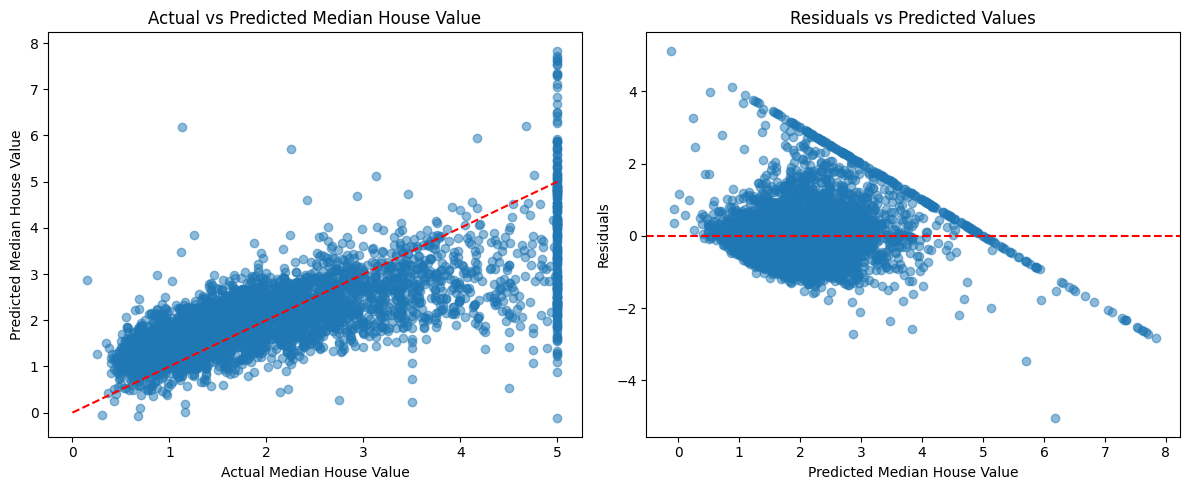

In [ ]:
# Plot actual vs predicted prices and residuals
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')     
plt.subplot(1, 2, 2) 
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()



**⚙️ Test Your Work:**

- Scatter plot clearly shows prediction alignment

- Residual plot doesn’t show major systematic error

## ✅ Success Checklist
- Dataset loaded into DataFrame

- EDA completed with meaningful plots

- Features cleaned and optionally standardized

- Top features selected based on correlation

- Model trained and evaluated

- Visualizations of predictions created

## 🔑 Key Points
- EDA is critical for understanding and preparing data

- Feature selection improves model performance and interpretability

- R-squared and MSE are key metrics for regression accuracy

## Exemplar Solution

After completing this activity (or if you get stuck!), take a moment to review the exemplar solution. This sample solution can offer insights into different techniques and approaches. 

Reflect on what you can learn from the exemplar solution to improve your coding skills.

Remember, multiple solutions can exist for some problems; the goal is to learn and grow as a programmer by exploring various approaches.

Use the exemplar solution as a learning tool to enhance your understanding and refine your approach to coding challenges.

<details>
    
<summary><strong>Click HERE to see an exemplar solution</strong></summary>    

```python
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 📂 Load the dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# 🔍 Explore the data
print(data.info())
print(data.describe())

# Plot histogram of target
plt.hist(data['MedHouseVal'], bins=30, edgecolor='k')
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 🧹 Data preparation
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 🧠 Feature selection (based on correlation heatmap)
selected_features = ['MedInc', 'AveRooms', 'HouseAge']
X_selected = X_scaled[selected_features]

# 🧪 Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 📈 Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Predict
y_pred = model.predict(X_test)

# 🧮 Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# 📊 Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Values")
plt.grid(True)
plt.show()
```